In [25]:
%matplotlib inline

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import openpyxl

In [2]:
import sys

sys.path.insert(0, '../modules/')

from hrd import HRD

In [3]:
seg_reports_path = '../datasets/SpaceAndTime/Segmental_reports/'
vcfs_path = '../datasets/SpaceAndTime/VCFs/'

samples = [
    {
        'Segmental report': 'P1.346403.Oxford/P1.346403.WES.10487.LungMET_events.txt',
        'VCF': 'Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.Source.vcf.gz',
        'Sample name': 'P29.346403.10487.MET'
    },
    {
        'Segmental report': 'P1.346403.Oxford/P1.346403.WES.9135.PRE_events.txt',
        'VCF': 'Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.Source.vcf.gz',
        'Sample name': 'P29.346403.9135.PRE'
    },
    
    
    
    {
        'Segmental report': 'P2.631450.Oxford/P2.631450.WES.20538.REC1_events.txt',
        'VCF': None,
        'Sample name': None # P62.631450.22059.NORM ?? zrejme nemá vzorku vo vcf
    },
    {
        'Segmental report': 'P2.631450.Oxford/P2.631450.WGS.16963.PRE_events.txt',
        'VCF': 'Variants_WGS_HF_P2.631450/P2.631450.WGS..HF.Source.vcf.gz',
        'Sample name': 'P62.631450.16963.PRE'
    },
    {
        'Segmental report': 'P2.631450.Oxford/P2.631450.WGS.22427.REC2_events.txt',
        'VCF': 'Variants_WGS_HF_P2.631450/P2.631450.WGS..HF.Source.vcf.gz',
        'Sample name': 'P62.631450.22427.REC2'
    },
    
    
    
    {
        'Segmental report': 'P3.668392.Oxford/P3.668392.WGS.22726.PRE_events.txt',
        'VCF': 'Variants_WGS_HF_P3.668392/P3.668392.WGS.HF.Source.vcf.gz',
        'Sample name': 'P71.668392.22726.PRE'
    },
    {
        'Segmental report': 'P3.668392.Oxford/P3.668392.WGS.24678.POST_events.txt',
        'VCF': 'Variants_WGS_HF_P3.668392/P3.668392.WGS.HF.Source.vcf.gz',
        'Sample name': 'P71.668392.24678.POST'
    },
    {
        'Segmental report': 'P3.668392.Oxford/P3.668392.WGS.25771.MET1a_events.txt',
        'VCF': None,
        'Sample name': None # P71.668392.24679.POST ?? zrejme nie
    },
    {
        'Segmental report': 'P3.668392.Oxford/P3.668392.WGS.25899.MET2a_events.txt',
        'VCF': 'Variants_WGS_HF_P3.668392/P3.668392.WGS.HF.Source.vcf.gz',
        'Sample name': 'P71.668392.25900.MET2' # ?? zrejme ok
    },
    
    
    
    {
        'Segmental report': 'P4.737383.Oxford/P4.737383.WES.27135.POST_events.txt',
        'VCF': 'Variants_WGS_HF_P4.737383/P4.737383.WGS.HF.Source.vcf.gz',
        'Sample name': 'P80.737383.27135.POST'
    },
    {
        'Segmental report': 'P4.737383.Oxford/P4.737383.WES.28519.MET2_events.txt',
        'VCF': 'Variants_WGS_HF_P4.737383/P4.737383.WGS.HF.Source.vcf.gz',
        'Sample name': 'P80.737383.28519.MET2'
    },
    
    
    
    {
        'Segmental report': 'P5/P5.670176.WGS.19835.PRE_events.txt',
        'VCF': 'Variants_WGS_HF_P5.670176/P5.670176.WGS.HF.Source.vcf.gz',
        'Sample name': 'P72.670176.19835.PRE'
    },
    {
        'Segmental report': 'P5/P5.670176.WGS.20135.POST_events.txt',
        'VCF': 'Variants_WGS_HF_P5.670176/P5.670176.WGS.HF.Source.vcf.gz',
        'Sample name': 'P72.670176.20135.POST'
    },
    
    
    
    {
        'Segmental report': 'P6.Inform/I062.007.WGS.Pre_events.txt',
        'VCF': None,
        'Sample name': None
    },
    {
        'Segmental report': 'P6.Inform/I062.007.WGS.Tumor_events.txt',
        'VCF': 'P6/P06.WGS.raw.vcf.gz',
        'Sample name': 'P6.Met4'
    },
    {
        'Segmental report': 'P6.Inform/I062.015.WGS.Tumor_events.txt',
        'VCF': 'P6/P06.WGS.raw.vcf.gz',
        'Sample name': 'P6.Met5'
    },
#     {
#         'Segmental report': 'P6.Inform/I062.022.WGS.Tumor_events.txt',
#         'VCF': 'P6/P06.WGS.raw.vcf.gz',
#         'Sample name': '' # zatial nemam
#     },
    {
        'Segmental report': 'P6.Inform/I062.033.WGS.Tumor_events.txt',
        'Segmental report header': False,
        'Segmental report sample name': 'P6.Rec7',
        'VCF': 'P6/P06.WGS.raw.vcf.gz',
        'Sample name': 'P6.Met7'
    },
    
    
    
    {
        'Segmental report': 'P7.268947/P10.268947.WGS.10208.MET3_events.txt',
        'VCF': 'Variants_WGS_HF_P10.268947/P10.268947.WGS.HF.Source.vcf.gz',
        'Sample name': 'P21.268947.10208.MET3'
    },
    {
        'Segmental report': 'P7.268947/P10.268947.WGS.7026.PRE_events.txt',
        'VCF': 'Variants_WGS_HF_P10.268947/P10.268947.WGS.HF.Source.vcf.gz',
        'Sample name': 'P21.268947.7026.PRE'
    },
    {
        'Segmental report': 'P7.268947/P10.268947.WGS.8785.MET1_events.txt',
        'VCF': 'Variants_WGS_HF_P10.268947/P10.268947.WGS.HF.Source.vcf.gz',
        'Sample name': 'P21.268947.8785.MET1'
    },
    {
        'Segmental report': 'P7.268947/P10.268947.WGS.9064.MET2_events.txt',
        'VCF': 'Variants_WGS_HF_P10.268947/P10.268947.WGS.HF.Source.vcf.gz',
        'Sample name': 'P21.268947.9064.MET2'
    },
    
    
    
    {
        'Segmental report': 'P8.267857/P8.267857.WGS.8046.MET_events.txt',
        'VCF': 'Variants_WGS_HF_P7.267857/P7.267857.WGS.HF.Source.vcf.gz',
        'Sample name': 'P20.267857.8046.MET'
    },
    {
        'Segmental report': 'P8.267857/P8.267857.WGS.8046.PRE_events.txt',
        'VCF': 'Variants_WGS_HF_P7.267857/P7.267857.WGS.HF.Source.vcf.gz',
        'Sample name': 'P20.267857.7202.PRE' # ?? zrejme OK
    },
    {
        'Segmental report': 'P8.267857/P8.267857.WGS.8046.REC_events.txt',
        'VCF': 'Variants_WGS_HF_P7.267857/P7.267857.WGS.HF.Source.vcf.gz',
        'Sample name': 'P20.267857.8290.REC' # ?? zrejme OK
    },
    
    
    
    {
        'Segmental report': 'P9.563259/P11.563259.WGS.13844.PRE_events.txt',
        'VCF': 'Variants_WGS_HF_P11.563259/P11.563259.WGS.HF.Source.vcf.gz',
        'Sample name': 'P.54.563259.13844.PRE'
    },
    {
        'Segmental report': 'P9.563259/P11.563259.WGS.14606.MET_events.txt',
        'VCF': 'Variants_WGS_HF_P11.563259/P11.563259.WGS.HF.Source.vcf.gz',
        'Sample name': 'P.54.563259.14606.MET'
    },
    
    
    
    {
        'Segmental report': 'P10.660085/P12.660085.WGS.19245.POST_events.txt',
        'VCF': 'Variants_WGS_HF_P12.660085/P12.660085.WGS.HF.Source.vcf.gz',
        'Sample name': 'P69.660085.19245.POST'
    },
    {
        'Segmental report': 'P10.660085/P12.660085.WGS.21013.MET1.1_events.txt',
        'VCF': 'Variants_WGS_HF_P12.660085/P12.660085.WGS.HF.Source.vcf.gz',
        'Sample name': 'P69.660085.21013.MET1.1'
    },
    {
        'Segmental report': 'P10.660085/P12.660085.WGS.2108.MET2_events.txt',
        'VCF': 'Variants_WGS_HF_P12.660085/P12.660085.WGS.HF.Source.vcf.gz',
        'Sample name': 'P69.660085.21018.MET2' # ?? zrejme ok
    },
    
    
    
    {
        'Segmental report': 'P11.182619/P9.182619.WGS.4290.PRE_events.txt',
        'VCF': 'Variants_WGS_HF_P9.182619/P9.182619.WGS.HF.Source.vcf.gz',
        'Sample name': 'P14.182619.4290.PRE'
    },
    {
        'Segmental report': 'P11.182619/P9.182619.WGS.5301.POST_events.txt',
        'VCF': 'Variants_WGS_HF_P9.182619/P9.182619.WGS.HF.Source.vcf.gz',
        'Sample name': 'P14.182619.5301.REC'
    },
    
    
    
    {
        'Segmental report': 'P12.476409/P13.476409.WGS.11123.PRE_events.txt',
        'VCF': 'Variants_WGS_HF_P13.476409/P13.476409.WGS.HF.Source.vcf.gz',
        'Sample name': 'P42.476409.11123.PRE'
    },
    {
        'Segmental report': 'P12.476409/P13.476409.WGS.11259.POST_events.txt',
        'VCF': 'Variants_WGS_HF_P13.476409/P13.476409.WGS.HF.Source.vcf.gz',
        'Sample name': 'P42.476409.11259.POST'
    }
]

In [4]:
sample = samples[14]
print(sample)
seg_relative_path = seg_reports_path + sample['Segmental report']

vcf_relative_path = None
if not sample['VCF'] is None:
    vcf_relative_path = vcfs_path + sample['VCF']

hrd_test = HRD(seg_relative_path, vcf_file=vcf_relative_path, vcf_sample_name=sample['Sample name'])
sample['LST'], sample['DNA index'] = hrd_test.test_lst()
sample['TAI'] = hrd_test.test_tai()
sample['LOH'] = hrd_test.test_loh()

sample

{'Segmental report': 'P6.Inform/I062.007.WGS.Tumor_events.txt', 'VCF': 'P6/P06.WGS.raw.vcf.gz', 'Sample name': 'P6.Met4'}


{'Segmental report': 'P6.Inform/I062.007.WGS.Tumor_events.txt',
 'VCF': 'P6/P06.WGS.raw.vcf.gz',
 'Sample name': 'P6.Met4',
 'LST': {'LST_3Mb': 22,
  'LST_4Mb': 17,
  'LST_5Mb': 12,
  'LST_6Mb': 12,
  'LST_7Mb': 10,
  'LST_8Mb': 8,
  'LST_9Mb': 7,
  'LST_10Mb': 7,
  'LST_11Mb': 6},
 'DNA index': 1.0359880661173113,
 'TAI': 5,
 'LOH': 0}

In [5]:
for sample in samples:
    print(sample['Segmental report'])
    seg_relative_path = seg_reports_path + sample['Segmental report']
    vcf_relative_path = None
    if not sample['VCF'] is None:
        vcf_relative_path = vcfs_path + sample['VCF']
        
    hrd_test = None
    
    if 'Segmental report header' in sample and sample['Segmental report header'] == False:
        hrd_test = HRD(seg_relative_path, seg_report_file_with_header=False, seg_report_sample_name=sample['Segmental report sample name'], \
                       vcf_file=vcf_relative_path, vcf_sample_name=sample['Sample name']) 
    else:
        hrd_test = HRD(seg_relative_path, vcf_file=vcf_relative_path, vcf_sample_name=sample['Sample name'])        
        
    sample['LST'], sample['DNA index'] = hrd_test.test_lst()
    sample['TAI'] = hrd_test.test_tai()
    sample['LOH'] = hrd_test.test_loh()


P1.346403.Oxford/P1.346403.WES.10487.LungMET_events.txt
P1.346403.Oxford/P1.346403.WES.9135.PRE_events.txt
P2.631450.Oxford/P2.631450.WES.20538.REC1_events.txt
P2.631450.Oxford/P2.631450.WGS.16963.PRE_events.txt
P2.631450.Oxford/P2.631450.WGS.22427.REC2_events.txt
P3.668392.Oxford/P3.668392.WGS.22726.PRE_events.txt
P3.668392.Oxford/P3.668392.WGS.24678.POST_events.txt
P3.668392.Oxford/P3.668392.WGS.25771.MET1a_events.txt
P3.668392.Oxford/P3.668392.WGS.25899.MET2a_events.txt
P4.737383.Oxford/P4.737383.WES.27135.POST_events.txt
P4.737383.Oxford/P4.737383.WES.28519.MET2_events.txt
P5/P5.670176.WGS.19835.PRE_events.txt
P5/P5.670176.WGS.20135.POST_events.txt
P6.Inform/I062.007.WGS.Pre_events.txt
P6.Inform/I062.007.WGS.Tumor_events.txt
P6.Inform/I062.015.WGS.Tumor_events.txt
P6.Inform/I062.033.WGS.Tumor_events.txt
P7.268947/P10.268947.WGS.10208.MET3_events.txt
P7.268947/P10.268947.WGS.7026.PRE_events.txt
P7.268947/P10.268947.WGS.8785.MET1_events.txt
P7.268947/P10.268947.WGS.9064.MET2_events.t

In [6]:
pd.set_option('display.max_columns', 1000)

In [9]:
results_data = pd.DataFrame(samples)
results_data = pd.concat([results_data, results_data['LST'].apply(pd.Series)], axis=1)
results_data.drop(columns=['Segmental report header', 'Segmental report sample name', 'LST'], inplace=True)

results_data

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb
0,P1.346403.Oxford/P1.346403.WES.10487.LungMET_e...,Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.So...,P29.346403.10487.MET,0.995681,62,1,62,40,30,23,17,15,13,9,5
1,P1.346403.Oxford/P1.346403.WES.9135.PRE_events...,Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.So...,P29.346403.9135.PRE,1.042693,40,14,61,41,27,20,16,13,11,11,9
2,P2.631450.Oxford/P2.631450.WES.20538.REC1_even...,None,None,1.021656,14,6,126,86,57,51,39,34,24,20,16
3,P2.631450.Oxford/P2.631450.WGS.16963.PRE_event...,Variants_WGS_HF_P2.631450/P2.631450.WGS..HF.So...,P62.631450.16963.PRE,0.962429,11,0,33,26,21,17,14,9,7,7,5
4,P2.631450.Oxford/P2.631450.WGS.22427.REC2_even...,Variants_WGS_HF_P2.631450/P2.631450.WGS..HF.So...,P62.631450.22427.REC2,0.965883,10,1,34,29,25,22,22,19,16,14,13
5,P3.668392.Oxford/P3.668392.WGS.22726.PRE_event...,Variants_WGS_HF_P3.668392/P3.668392.WGS.HF.Sou...,P71.668392.22726.PRE,1.052132,14,0,13,11,10,10,8,7,7,7,6
6,P3.668392.Oxford/P3.668392.WGS.24678.POST_even...,Variants_WGS_HF_P3.668392/P3.668392.WGS.HF.Sou...,P71.668392.24678.POST,1.057139,13,0,8,8,8,8,8,7,7,7,7
7,P3.668392.Oxford/P3.668392.WGS.25771.MET1a_eve...,None,None,1.046373,12,0,9,8,8,8,8,7,7,7,7
8,P3.668392.Oxford/P3.668392.WGS.25899.MET2a_eve...,Variants_WGS_HF_P3.668392/P3.668392.WGS.HF.Sou...,P71.668392.25900.MET2,1.071727,9,0,8,8,8,8,8,7,7,7,7
9,P4.737383.Oxford/P4.737383.WES.27135.POST_even...,Variants_WGS_HF_P4.737383/P4.737383.WGS.HF.Sou...,P80.737383.27135.POST,1.049255,12,0,30,23,22,15,15,13,11,9,7


In [13]:
import openpyxl

results_data.to_excel("../datasets/hrd_results.xlsx")

In [14]:
pd.read_excel("../datasets/hrd_results.xlsx", index_col=0) 

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb
0,P1.346403.Oxford/P1.346403.WES.10487.LungMET_e...,Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.So...,P29.346403.10487.MET,0.995681,62,1,62,40,30,23,17,15,13,9,5
1,P1.346403.Oxford/P1.346403.WES.9135.PRE_events...,Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.So...,P29.346403.9135.PRE,1.042693,40,14,61,41,27,20,16,13,11,11,9
2,P2.631450.Oxford/P2.631450.WES.20538.REC1_even...,NaN,NaN,1.021656,14,6,126,86,57,51,39,34,24,20,16
3,P2.631450.Oxford/P2.631450.WGS.16963.PRE_event...,Variants_WGS_HF_P2.631450/P2.631450.WGS..HF.So...,P62.631450.16963.PRE,0.962429,11,0,33,26,21,17,14,9,7,7,5
4,P2.631450.Oxford/P2.631450.WGS.22427.REC2_even...,Variants_WGS_HF_P2.631450/P2.631450.WGS..HF.So...,P62.631450.22427.REC2,0.965883,10,1,34,29,25,22,22,19,16,14,13
5,P3.668392.Oxford/P3.668392.WGS.22726.PRE_event...,Variants_WGS_HF_P3.668392/P3.668392.WGS.HF.Sou...,P71.668392.22726.PRE,1.052132,14,0,13,11,10,10,8,7,7,7,6
6,P3.668392.Oxford/P3.668392.WGS.24678.POST_even...,Variants_WGS_HF_P3.668392/P3.668392.WGS.HF.Sou...,P71.668392.24678.POST,1.057139,13,0,8,8,8,8,8,7,7,7,7
7,P3.668392.Oxford/P3.668392.WGS.25771.MET1a_eve...,NaN,NaN,1.046373,12,0,9,8,8,8,8,7,7,7,7
8,P3.668392.Oxford/P3.668392.WGS.25899.MET2a_eve...,Variants_WGS_HF_P3.668392/P3.668392.WGS.HF.Sou...,P71.668392.25900.MET2,1.071727,9,0,8,8,8,8,8,7,7,7,7
9,P4.737383.Oxford/P4.737383.WES.27135.POST_even...,Variants_WGS_HF_P4.737383/P4.737383.WGS.HF.Sou...,P80.737383.27135.POST,1.049255,12,0,30,23,22,15,15,13,11,9,7


In [16]:
results_data.describe()

,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,1.004405,9.454545,0.757576,42.636364,33.060606,26.969697,22.818182,19.636364,16.393939,14.090909,12.606061,11.303030
std,0.075864,11.763532,2.610439,31.132598,23.329085,17.178265,14.218066,11.488631,9.804143,8.538017,7.717429,7.182813
min,0.836970,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.970142,4.000000,0.000000,14.000000,13.000000,10.000000,10.000000,8.000000,8.000000,7.000000,7.000000,6.000000
50%,1.017886,6.000000,0.000000,35.000000,29.000000,25.000000,20.000000,17.000000,15.000000,13.000000,11.000000,10.000000
75%,1.049255,11.000000,0.000000,62.000000,54.000000,39.000000,32.000000,28.000000,24.000000,21.000000,18.000000,17.000000
max,1.144981,62.000000,14.000000,126.000000,86.000000,60.000000,51.000000,40.000000,35.000000,32.000000,31.000000,29.000000


## Analýza jednotlivých atribútov

### TAI

In [18]:
results_data['TAI'].mean()

9.454545454545455

In [19]:
results_data['TAI'].median()

6.0

In [20]:
results_data['TAI'].skew()

3.4691909002048757

In [22]:
results_data['TAI'].kurtosis()

13.485944841703605

<AxesSubplot:xlabel='TAI'>

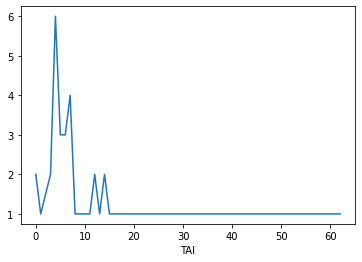

In [23]:
results_data.groupby('TAI').size().plot()

<AxesSubplot:xlabel='TAI', ylabel='Count'>

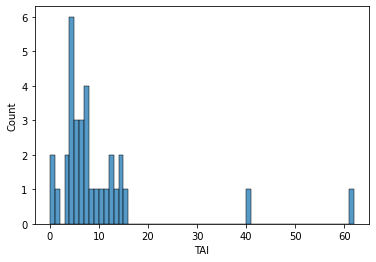

In [30]:
sns.histplot(results_data['TAI'], binwidth=1)

Môžeme vidieť že distribúcia hodnôt TAI je naklonená doľava, čo hovoria aj miery skewness a kurtosis

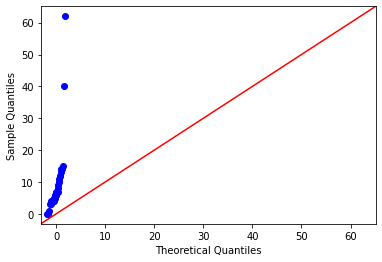

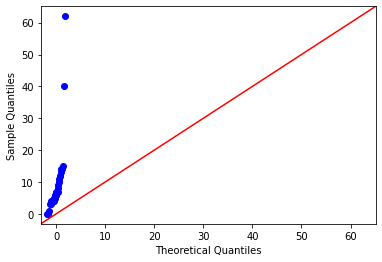

In [36]:
sm.qqplot(results_data['TAI'], line='45')

Šikmosť smerom vľavo možno vyčítať aj z qq-plotu.

<AxesSubplot:xlabel='TAI'>

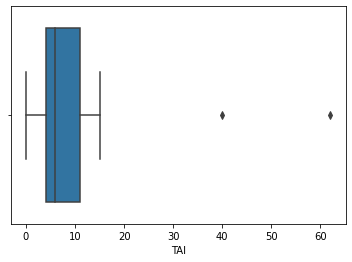

In [37]:
sns.boxplot(x=results_data['TAI'])

Medzi hodnotami TAI sa nachádzajú 2 veľmi vychýlené hodnoty. Hodnoty sa pohybujú v intervale 0 až cca 15.

### LOH

In [39]:
results_data['LOH'].mean()

0.7575757575757576

In [42]:
results_data['LOH'].median()

0.0

In [44]:
results_data['LOH'].skew()

4.59117099674899

In [46]:
results_data['LOH'].kurtosis()

22.284508765017954

<AxesSubplot:xlabel='LOH'>

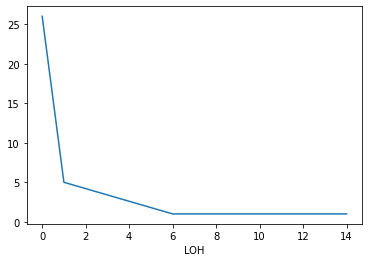

In [47]:
results_data.groupby('LOH').size().plot()

<AxesSubplot:xlabel='LOH', ylabel='Count'>

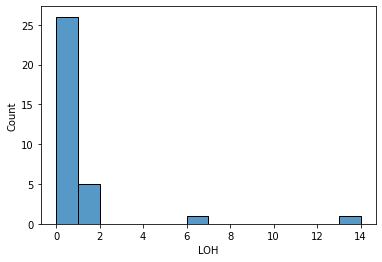

In [49]:
sns.histplot(results_data['LOH'], binwidth=1)

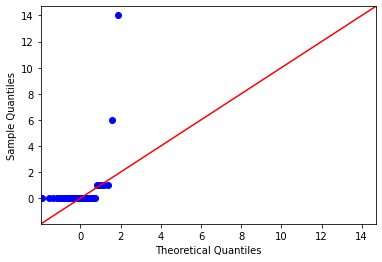

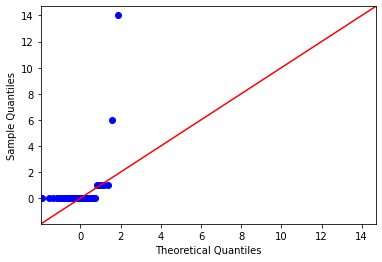

In [50]:
sm.qqplot(results_data['LOH'], line='45')

<AxesSubplot:xlabel='LOH'>

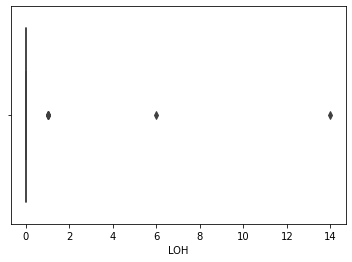

In [51]:
sns.boxplot(x=results_data['LOH'])

Na grafoch možno vidieť, že LOH nadobúdalo veľmi malé hodnoty väčšinou 0 a 1, iba tri vzorky mali väčšie hodnoty

### LST

#### LST_11Mb

In [52]:
results_data['LST_11Mb'].mean()

11.303030303030303

In [53]:
results_data['LST_11Mb'].median()

10.0

In [54]:
results_data['LST_11Mb'].skew()

0.6400594371078407

In [55]:
results_data['LST_11Mb'].kurtosis()

-0.1848897278962358

<AxesSubplot:xlabel='LST_11Mb'>

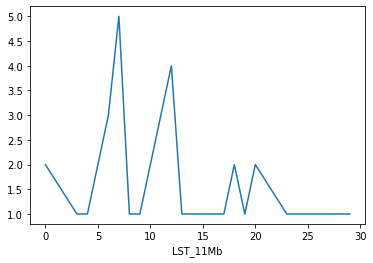

In [56]:
results_data.groupby('LST_11Mb').size().plot()

<AxesSubplot:xlabel='LST_11Mb', ylabel='Count'>

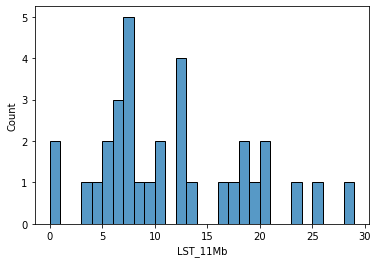

In [57]:
sns.histplot(results_data['LST_11Mb'], binwidth=1)

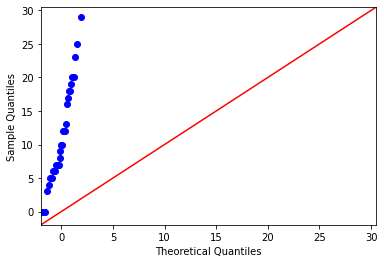

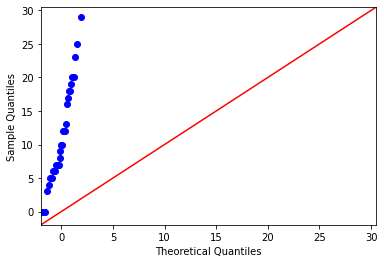

In [59]:
sm.qqplot(results_data['LST_11Mb'], line='45')

<AxesSubplot:xlabel='LST_11Mb'>

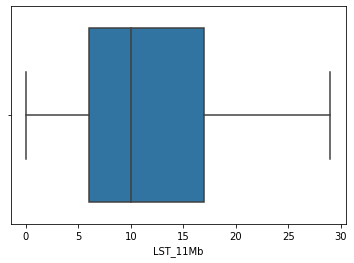

In [60]:
sns.boxplot(x=results_data['LST_11Mb'])

#### LST_10Mb

In [61]:
results_data['LST_10Mb'].mean()

12.606060606060606

In [62]:
results_data['LST_10Mb'].median()

11.0

In [63]:
results_data['LST_10Mb'].skew()

0.595164164432075

In [69]:
results_data['LST_10Mb'].kurtosis()

-0.31848800690152546

<AxesSubplot:xlabel='LST_10Mb'>

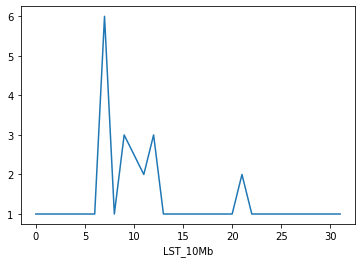

In [65]:
results_data.groupby('LST_10Mb').size().plot()

<AxesSubplot:xlabel='LST_10Mb', ylabel='Count'>

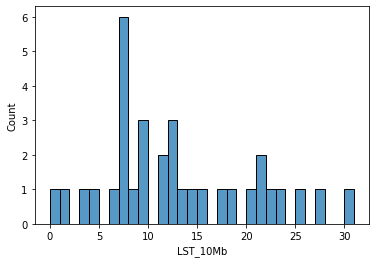

In [66]:
sns.histplot(results_data['LST_10Mb'], binwidth=1)

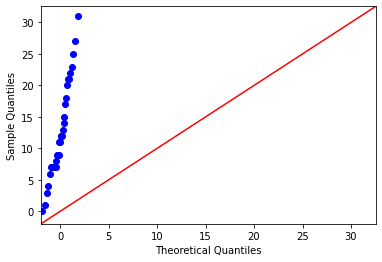

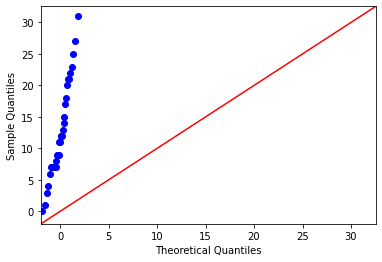

In [67]:
sm.qqplot(results_data['LST_10Mb'], line='45')

<AxesSubplot:xlabel='LST_10Mb'>

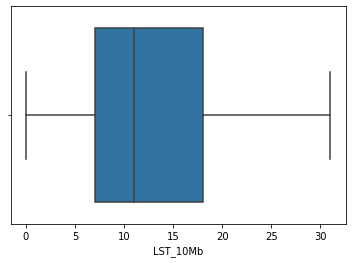

In [68]:
sns.boxplot(x=results_data['LST_10Mb'])

#### LST 9Mb

In [71]:
results_data['LST_9Mb'].mean()

14.090909090909092

In [72]:
results_data['LST_9Mb'].median()

13.0

In [73]:
results_data['LST_9Mb'].skew()

0.36412915181325256

In [74]:
results_data['LST_9Mb'].kurtosis()

-0.8321256113635842

<AxesSubplot:xlabel='LST_9Mb'>

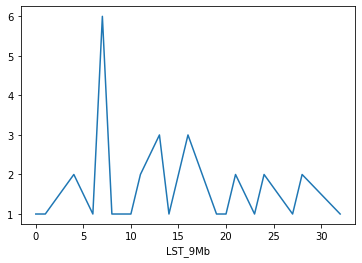

In [75]:
results_data.groupby('LST_9Mb').size().plot()

<AxesSubplot:xlabel='LST_9Mb', ylabel='Count'>

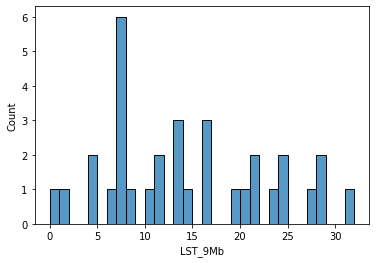

In [76]:
sns.histplot(results_data['LST_9Mb'], binwidth=1)

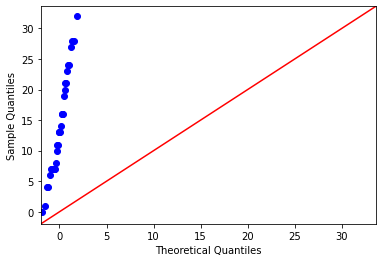

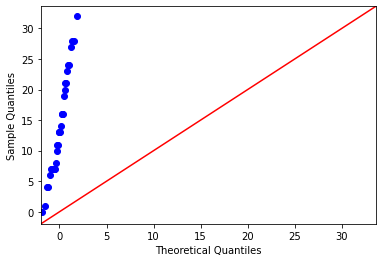

In [77]:
sm.qqplot(results_data['LST_9Mb'], line='45')

<AxesSubplot:xlabel='LST_9Mb'>

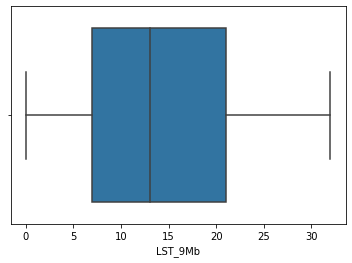

In [78]:
sns.boxplot(x=results_data['LST_9Mb'])

#### LST 8Mb

In [79]:
results_data['LST_8Mb'].mean()

16.393939393939394

In [80]:
results_data['LST_8Mb'].median()

15.0

In [81]:
results_data['LST_8Mb'].skew()

0.39542423375121843

In [82]:
results_data['LST_8Mb'].kurtosis()

-0.8893499177087181

<AxesSubplot:xlabel='LST_8Mb'>

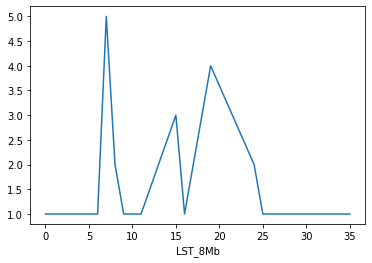

In [83]:
results_data.groupby('LST_8Mb').size().plot()

<AxesSubplot:xlabel='LST_8Mb', ylabel='Count'>

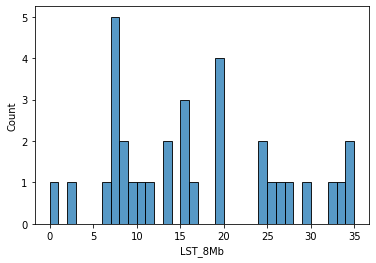

In [84]:
sns.histplot(results_data['LST_8Mb'], binwidth=1)

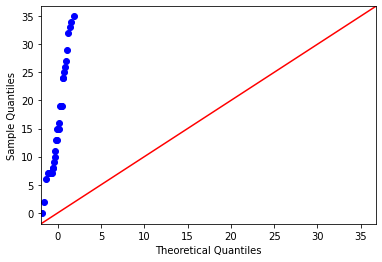

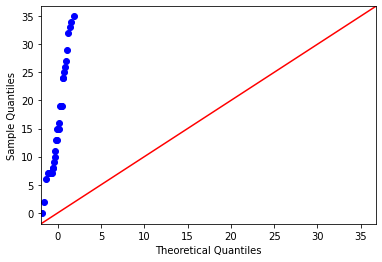

In [85]:
sm.qqplot(results_data['LST_8Mb'], line='45')

<AxesSubplot:xlabel='LST_8Mb'>

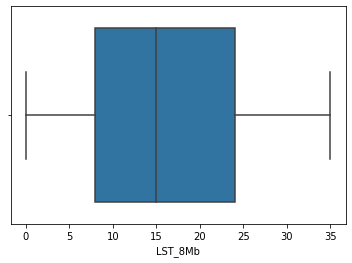

In [86]:
sns.boxplot(x=results_data['LST_8Mb'])

#### LST 7Mb

In [87]:
results_data['LST_7Mb'].mean()

19.636363636363637

In [88]:
results_data['LST_7Mb'].median()

17.0

In [89]:
results_data['LST_7Mb'].skew()

0.3054033652109363

In [90]:
results_data['LST_7Mb'].kurtosis()

-1.0376632912796353

<AxesSubplot:xlabel='LST_7Mb'>

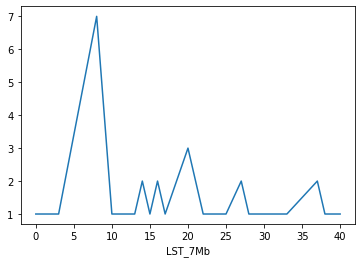

In [91]:
results_data.groupby('LST_7Mb').size().plot()

<AxesSubplot:xlabel='LST_7Mb', ylabel='Count'>

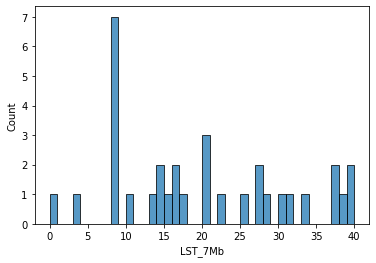

In [92]:
sns.histplot(results_data['LST_7Mb'], binwidth=1)

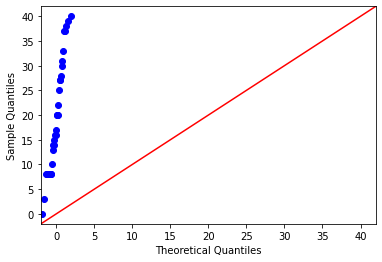

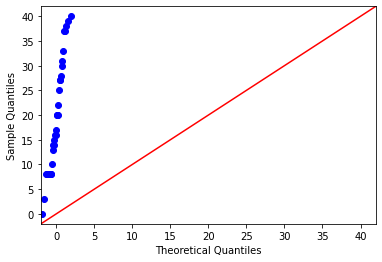

In [93]:
sm.qqplot(results_data['LST_7Mb'], line='45')

<AxesSubplot:xlabel='LST_7Mb'>

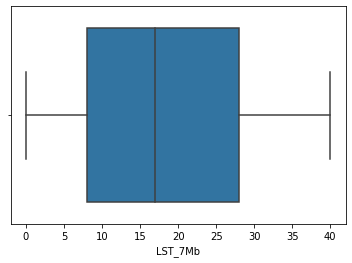

In [94]:
sns.boxplot(x=results_data['LST_7Mb'])

#### LST 6Mb

In [104]:
results_data['LST_6Mb'].mean()

22.818181818181817

In [105]:
results_data['LST_6Mb'].median()

20.0

In [106]:
results_data['LST_6Mb'].skew()

0.5140986348716319

In [107]:
results_data['LST_6Mb'].kurtosis()

-0.8192892525661719

<AxesSubplot:xlabel='LST_6Mb'>

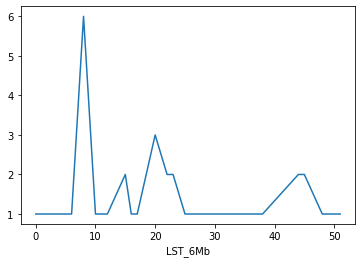

In [108]:
results_data.groupby('LST_6Mb').size().plot()

<AxesSubplot:xlabel='LST_6Mb', ylabel='Count'>

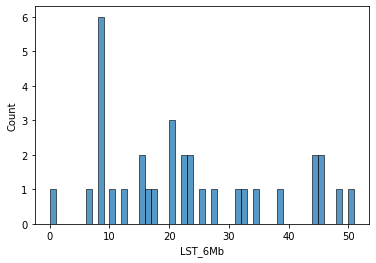

In [109]:
sns.histplot(results_data['LST_6Mb'], binwidth=1)

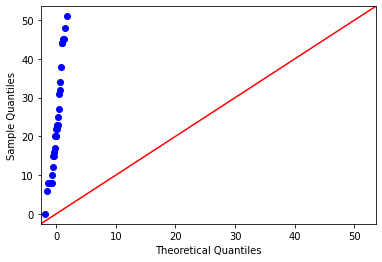

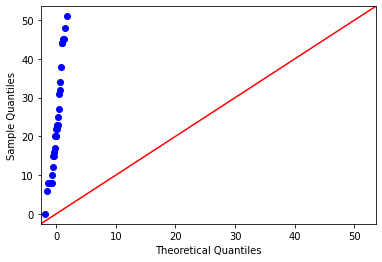

In [110]:
sm.qqplot(results_data['LST_6Mb'], line='45')

<AxesSubplot:xlabel='LST_6Mb'>

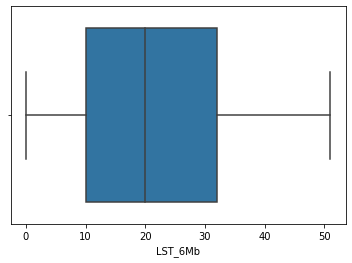

In [111]:
sns.boxplot(x=results_data['LST_6Mb'])

#### LST 5Mb

In [112]:
results_data['LST_5Mb'].mean()

26.96969696969697

In [113]:
results_data['LST_5Mb'].median()

25.0

In [114]:
results_data['LST_5Mb'].skew()

0.45575681227296694

In [115]:
results_data['LST_5Mb'].kurtosis()

-0.9042532111612709

<AxesSubplot:xlabel='LST_5Mb'>

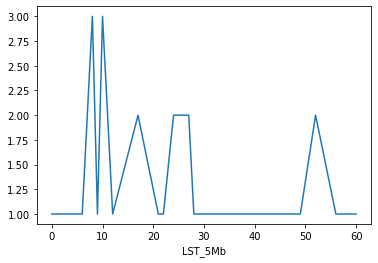

In [116]:
results_data.groupby('LST_5Mb').size().plot()

<AxesSubplot:xlabel='LST_5Mb', ylabel='Count'>

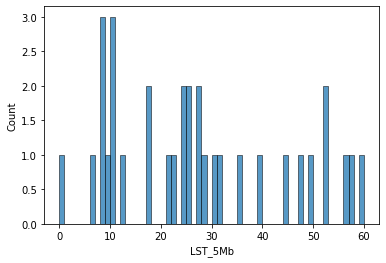

In [117]:
sns.histplot(results_data['LST_5Mb'], binwidth=1)

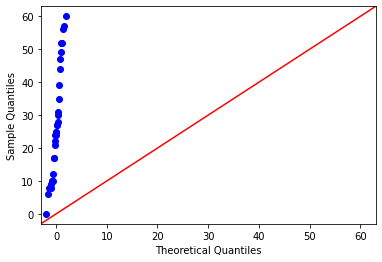

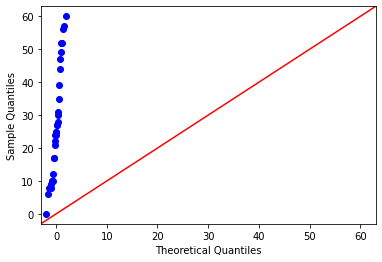

In [118]:
sm.qqplot(results_data['LST_5Mb'], line='45')

<AxesSubplot:xlabel='LST_5Mb'>

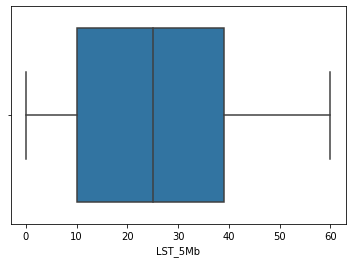

In [119]:
sns.boxplot(x=results_data['LST_5Mb'])

#### LST 4Mb

In [120]:
results_data['LST_4Mb'].mean()

33.06060606060606

In [121]:
results_data['LST_4Mb'].median()

29.0

In [122]:
results_data['LST_4Mb'].skew()

0.687708645785125

In [123]:
results_data['LST_4Mb'].kurtosis()

-0.46044072661372315

<AxesSubplot:xlabel='LST_4Mb'>

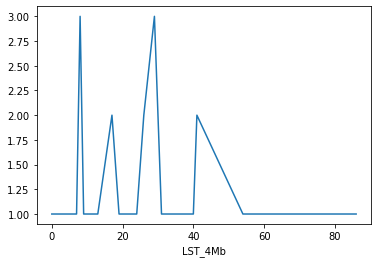

In [124]:
results_data.groupby('LST_4Mb').size().plot()

<AxesSubplot:xlabel='LST_4Mb', ylabel='Count'>

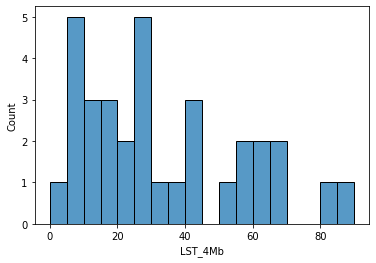

In [136]:
sns.histplot(results_data['LST_4Mb'], binwidth=5)

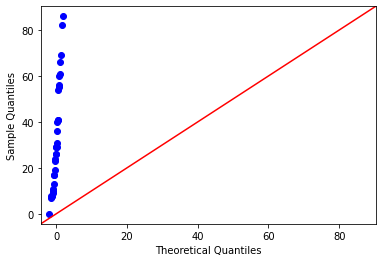

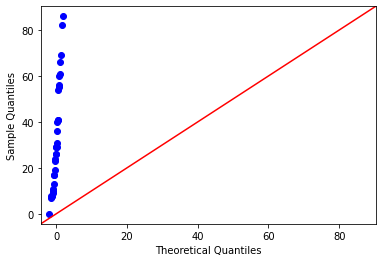

In [126]:
sm.qqplot(results_data['LST_4Mb'], line='45')

<AxesSubplot:xlabel='LST_4Mb'>

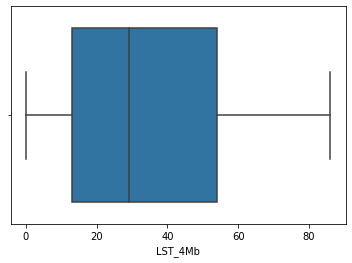

In [127]:
sns.boxplot(x=results_data['LST_4Mb'])

#### LST 3Mb

In [128]:
results_data['LST_3Mb'].mean()

42.63636363636363

In [129]:
results_data['LST_3Mb'].median()

35.0

In [130]:
results_data['LST_3Mb'].skew()

0.8633417561616822

In [131]:
results_data['LST_3Mb'].kurtosis()

0.07993838647223006

<AxesSubplot:xlabel='LST_3Mb'>

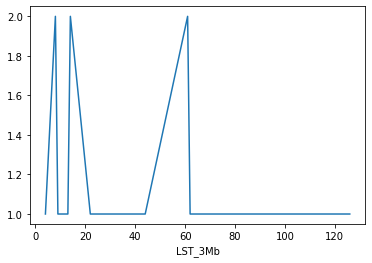

In [132]:
results_data.groupby('LST_3Mb').size().plot()

<AxesSubplot:xlabel='LST_3Mb', ylabel='Count'>

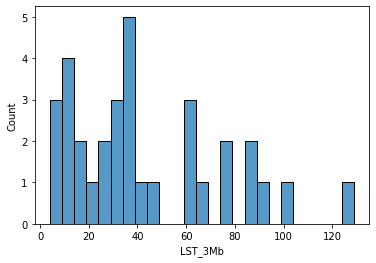

In [133]:
sns.histplot(results_data['LST_3Mb'], binwidth=5)

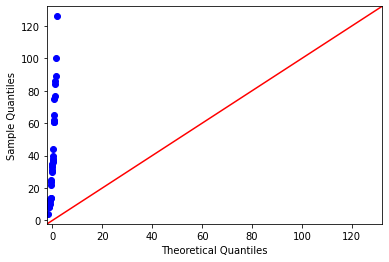

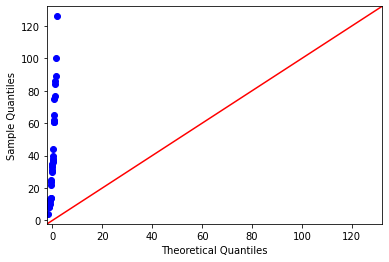

In [134]:
sm.qqplot(results_data['LST_3Mb'], line='45')

<AxesSubplot:xlabel='LST_3Mb'>

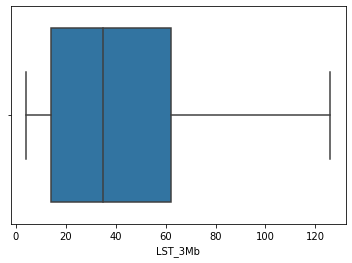

In [135]:
sns.boxplot(x=results_data['LST_3Mb'])

### HRD

#### HRD s LST_11Mb

In [137]:
results_data['HRD'] = results_data['TAI'] + results_data['LOH'] + results_data['LST_11Mb']

In [139]:
results_data['HRD'].mean()

21.515151515151516

In [140]:
results_data['HRD'].median()

20.0

In [141]:
results_data['HRD'].skew()

2.154714680861979

In [142]:
results_data['HRD'].kurtosis()

5.991790527922646

<AxesSubplot:xlabel='HRD'>

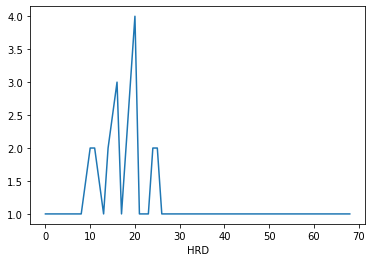

In [143]:
results_data.groupby('HRD').size().plot()

<AxesSubplot:xlabel='LST_3Mb', ylabel='Count'>

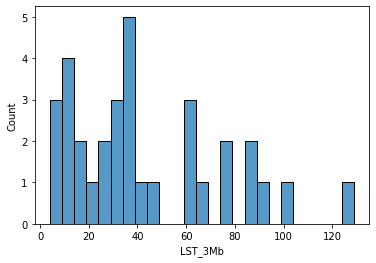

In [133]:
sns.histplot(results_data['HRD'], binwidth=5)

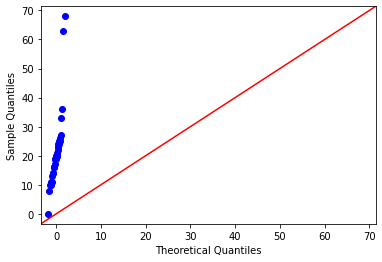

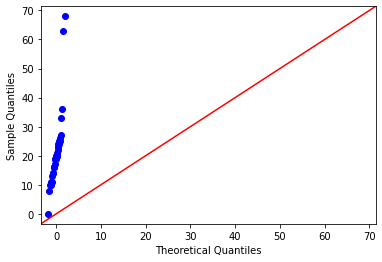

In [144]:
sm.qqplot(results_data['HRD'], line='45')

<AxesSubplot:xlabel='HRD'>

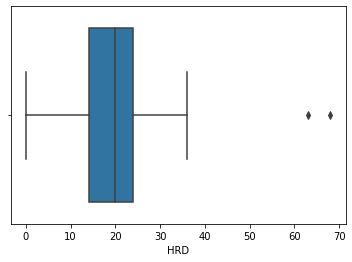

In [145]:
sns.boxplot(x=results_data['HRD'])

#### HRD s LST_10Mb

In [146]:
results_data['HRD_10'] = results_data['TAI'] + results_data['LOH'] + results_data['LST_10Mb']

In [147]:
results_data['HRD_10'].mean()

22.818181818181817

In [148]:
results_data['HRD_10'].median()

20.0

In [149]:
results_data['HRD_10'].skew()

2.0829509593807645

In [150]:
results_data['HRD_10'].kurtosis()

5.565219960395238

<AxesSubplot:xlabel='HRD_10'>

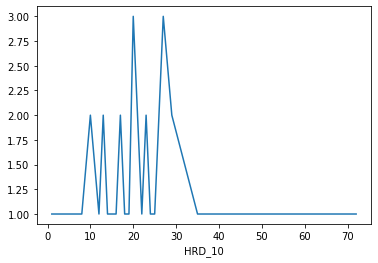

In [151]:
results_data.groupby('HRD_10').size().plot()

<AxesSubplot:xlabel='HRD_10', ylabel='Count'>

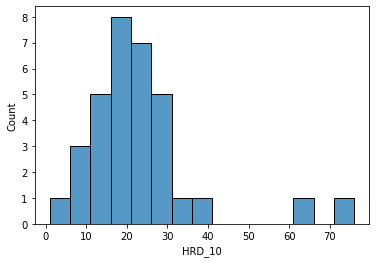

In [152]:
sns.histplot(results_data['HRD_10'], binwidth=5)

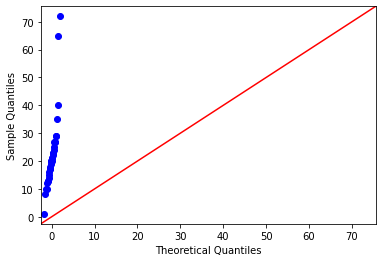

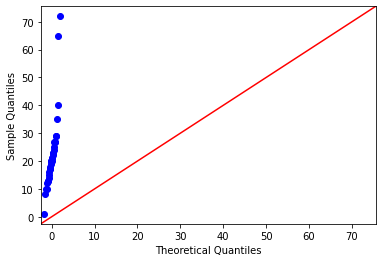

In [153]:
sm.qqplot(results_data['HRD_10'], line='45')

<AxesSubplot:xlabel='HRD_10'>

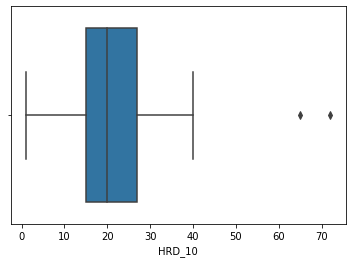

In [154]:
sns.boxplot(x=results_data['HRD_10'])

#### HRD s LST_9Mb

In [155]:
results_data['HRD_9'] = results_data['TAI'] + results_data['LOH'] + results_data['LST_9Mb']

In [156]:
results_data['HRD_9'].mean()

24.303030303030305

In [157]:
results_data['HRD_9'].median()

23.0

In [158]:
results_data['HRD_9'].skew()

1.9064992502795286

In [159]:
results_data['HRD_9'].kurtosis()

4.953810698180639

<AxesSubplot:xlabel='HRD_9'>

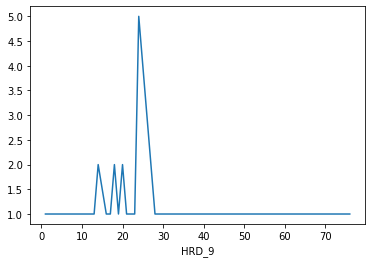

In [160]:
results_data.groupby('HRD_9').size().plot()

<AxesSubplot:xlabel='HRD_9', ylabel='Count'>

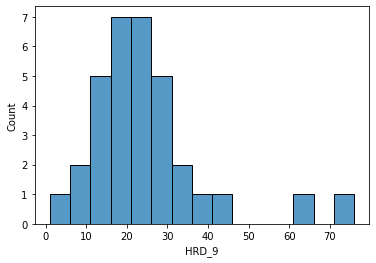

In [161]:
sns.histplot(results_data['HRD_9'], binwidth=5)

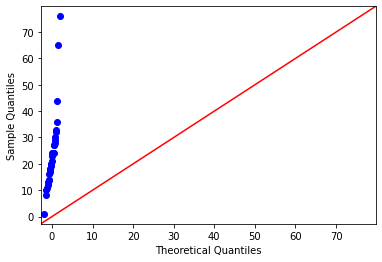

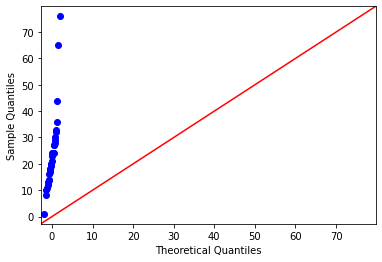

In [162]:
sm.qqplot(results_data['HRD_9'], line='45')

<AxesSubplot:xlabel='HRD_9'>

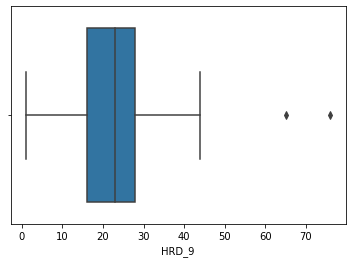

In [163]:
sns.boxplot(x=results_data['HRD_9'])

#### HRD s LST_8Mb

In [164]:
results_data['HRD_8'] = results_data['TAI'] + results_data['LOH'] + results_data['LST_8Mb']

In [165]:
results_data['HRD_8'].mean()

26.606060606060606

In [166]:
results_data['HRD_8'].median()

24.0

In [167]:
results_data['HRD_8'].skew()

1.6489024323087103

In [168]:
results_data['HRD_8'].kurtosis()

3.5472886888557604

<AxesSubplot:xlabel='HRD_8'>

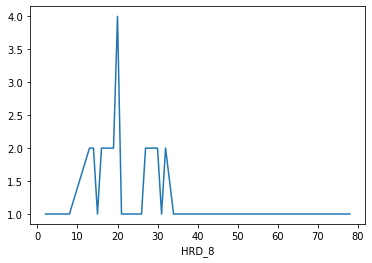

In [169]:
results_data.groupby('HRD_8').size().plot()

<AxesSubplot:xlabel='HRD_8', ylabel='Count'>

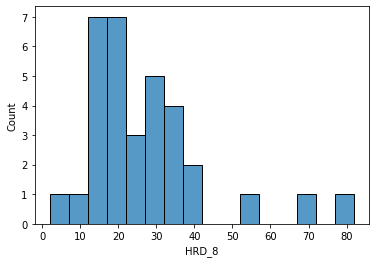

In [170]:
sns.histplot(results_data['HRD_8'], binwidth=5)

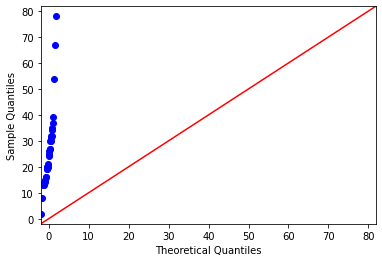

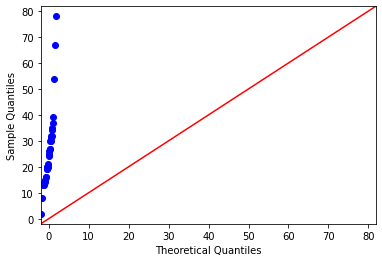

In [171]:
sm.qqplot(results_data['HRD_8'], line='45')

<AxesSubplot:xlabel='HRD_8'>

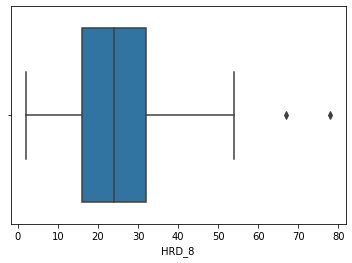

In [172]:
sns.boxplot(x=results_data['HRD_8'])

#### Párová analýza atribútov

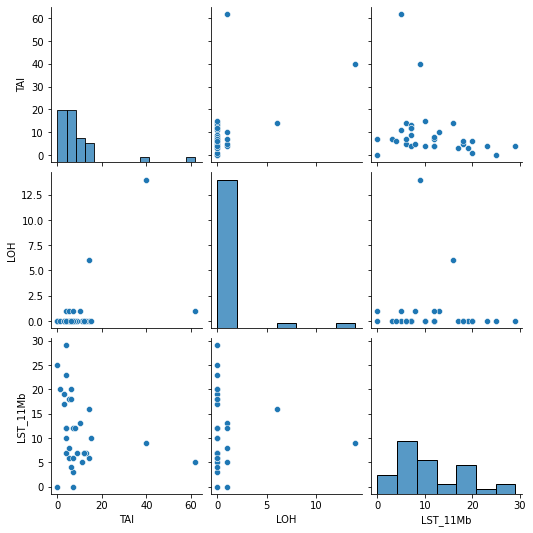

In [177]:
sns.pairplot(results_data.loc[:, ['TAI', 'LOH', 'LST_11Mb']])

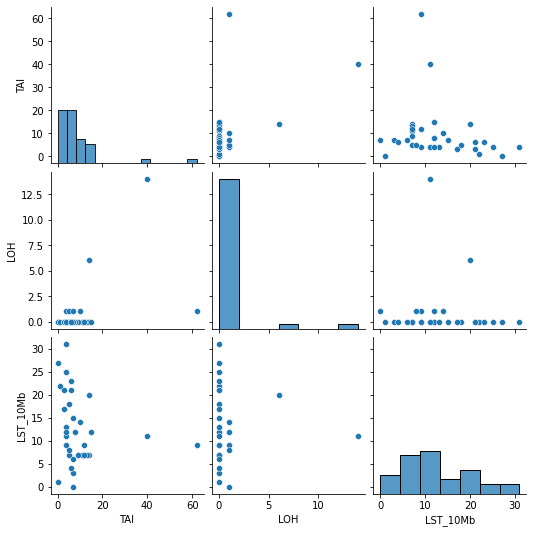

In [178]:
sns.pairplot(results_data.loc[:, ['TAI', 'LOH', 'LST_10Mb']])

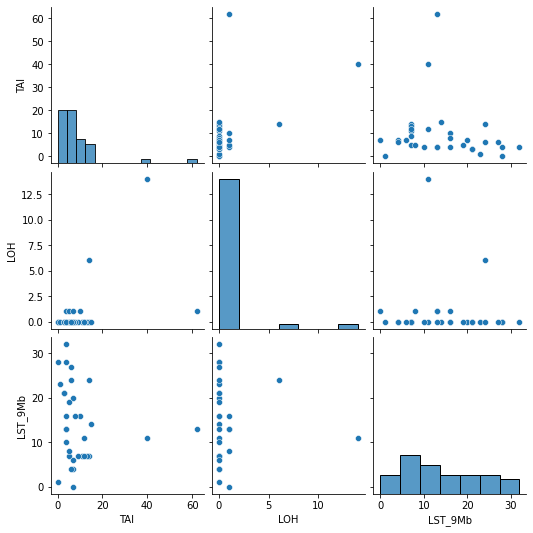

In [179]:
sns.pairplot(results_data.loc[:, ['TAI', 'LOH', 'LST_9Mb']])

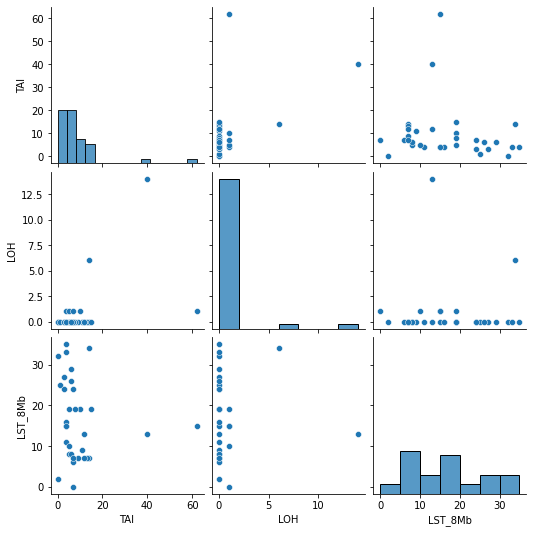

In [180]:
sns.pairplot(results_data.loc[:, ['TAI', 'LOH', 'LST_8Mb']])

<AxesSubplot:>

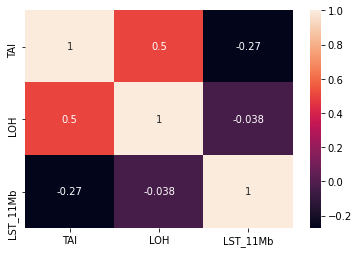

In [183]:
sns.heatmap(results_data.loc[:, ['TAI', 'LOH', 'LST_11Mb']].corr(), annot=True)

<AxesSubplot:>

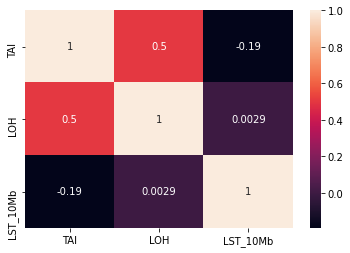

In [184]:
sns.heatmap(results_data.loc[:, ['TAI', 'LOH', 'LST_10Mb']].corr(), annot=True)

<AxesSubplot:>

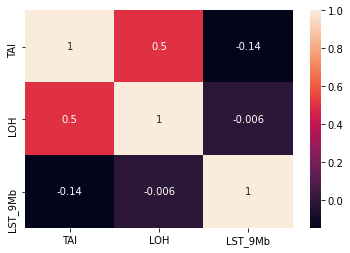

In [185]:
sns.heatmap(results_data.loc[:, ['TAI', 'LOH', 'LST_9Mb']].corr(), annot=True)

<AxesSubplot:>

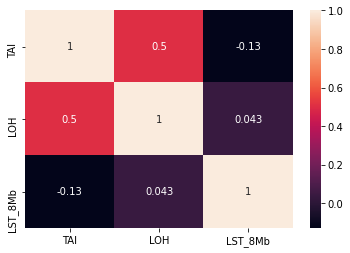

In [186]:
sns.heatmap(results_data.loc[:, ['TAI', 'LOH', 'LST_8Mb']].corr(), annot=True)